<a href="https://colab.research.google.com/github/JBonilla00/Core-_Assignments/blob/main/Logistic%2C__Random__forest%2C_or_KNN%3F_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [124]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor

In [125]:
df = pd.read_csv('/content/Wine_cultivars.csv')
df.head()

,Class label,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavonid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [126]:
# 1) Use a logistic regression model and try both l1 and l2 regularization. This is a great opportunity to see how tuning hyperparameters can affect the model results. 

In [127]:
X = df.drop(columns = 'Class label')
y = df['Class label']

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, stratify = y)

In [129]:
scaler = StandardScaler() 

logreg = LogisticRegression()

logreg_pipe = make_pipeline(scaler, logreg) 

logreg_pipe.fit(X_train, y_train); 

predictions = logreg_pipe.predict(X_test)
predictions

array([1, 2, 1, 1, 2, 1, 1, 2, 2, 3, 2, 2, 3, 3, 1, 2, 2, 1, 1, 3, 3, 3,
       1, 1, 2, 2, 1, 2, 1, 2, 1, 3, 2, 3, 3, 2, 1, 3, 3, 2, 3, 2, 1, 2,
       2])

In [130]:
score = logreg_pipe.score(X_test, y_test)
print(score)

1.0


In [131]:
example_df = pd.DataFrame(data = {'Color intensity': X_test['Color intensity'],
                     'diagnosis': y_test})
example_df['logistic_preds'] = pd.DataFrame(logreg_pipe.predict_proba(X_test)).loc[:, 1].values
example_df = example_df.sort_values(['logistic_preds'])

Text(0.5, 0, 'Color intensity')

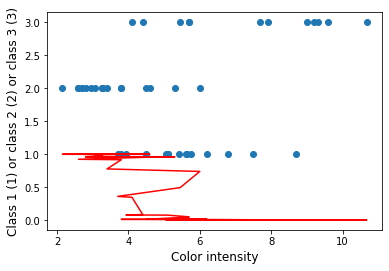

In [132]:
plt.scatter(X_test['Color intensity'], y_test)
plt.plot(example_df['Color intensity'], example_df['logistic_preds'].values, color='red')
plt.ylabel('Class 1 (1) or class 2 (2) or class 3 (3)', fontsize = 12)
plt.xlabel('Color intensity', fontsize = 12)

{0.0001: 0.3333333333333333,
 0.001: 0.3333333333333333,
 0.01: 0.3333333333333333,
 0.1: 0.9777777777777777,
 1: 0.9777777777777777,
 10: 0.9777777777777777,
 100: 0.9777777777777777,
 1000: 0.9777777777777777}

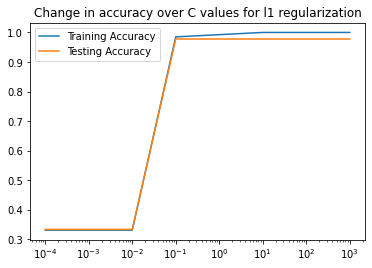

In [151]:
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
 
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
  log_reg_pipe = make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))
 
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()
 
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

{0.0001: 0.9111111111111111,
 0.001: 0.9333333333333333,
 0.01: 0.9777777777777777,
 0.1: 1.0,
 1: 1.0,
 10: 1.0,
 100: 0.9777777777777777,
 1000: 0.9777777777777777}

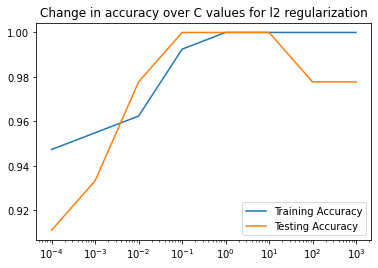

In [152]:
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2')
  log_reg_pipe = make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))
  
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l2 regularization')
ax.legend()
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

In [135]:
# 2) After doing that, try using KNN and Random Forest models. 

In [136]:
knn = KNeighborsClassifier(n_neighbors=1)

In [137]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

In [138]:
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=1))])

In [139]:
predictions = knn_pipe.predict(X_test)
predictions

array([1, 2, 1, 1, 2, 1, 1, 2, 2, 3, 2, 2, 3, 3, 1, 1, 2, 1, 1, 3, 3, 3,
       1, 1, 3, 2, 1, 2, 1, 2, 1, 3, 2, 3, 3, 2, 1, 3, 3, 2, 3, 2, 1, 2,
       2])

In [140]:
acc_score = knn_pipe.score(X_test, y_test)
acc_score

0.9555555555555556

In [141]:
3
rf = RandomForestRegressor(random_state = 42)

In [142]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [143]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [144]:
rf.predict(X_test)

array([1.01, 1.99, 1.  , 1.  , 2.  , 1.  , 1.02, 2.03, 1.93, 2.82, 1.71,
       2.08, 3.  , 3.  , 1.07, 1.87, 2.  , 1.04, 1.  , 3.  , 2.6 , 3.  ,
       1.25, 1.  , 2.48, 2.07, 1.  , 1.74, 1.13, 1.99, 1.18, 2.99, 1.96,
       2.96, 3.  , 2.03, 1.02, 2.96, 2.93, 2.04, 2.87, 1.93, 1.02, 2.06,
       1.79])

In [145]:
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

0.9905795858547655
0.9697723880597015


In [146]:
rf_9 = RandomForestRegressor(max_depth = 9, random_state = 42)
rf_9.fit(X_train, y_train)
rf_9_train_score = rf_9.score(X_train, y_train)
rf_9_test_score = rf_9.score(X_test, y_test)
print(rf_9_train_score)
print(rf_9_test_score)

0.9905795858547655
0.9697723880597015


In [147]:
[estimator.get_depth() for estimator in rf.estimators_]

[3,
 3,
 4,
 4,
 3,
 5,
 3,
 4,
 3,
 5,
 3,
 3,
 4,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 6,
 4,
 4,
 4,
 3,
 4,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 5,
 3,
 3,
 3,
 3,
 5,
 3,
 5,
 4,
 3,
 3,
 3,
 3,
 5,
 4,
 4,
 3,
 3,
 6,
 3,
 4,
 4,
 3,
 3,
 5,
 3,
 3,
 3,
 4,
 5,
 3,
 3,
 5,
 3,
 3,
 3,
 3,
 5,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 4,
 4,
 5,
 3,
 3,
 4,
 3,
 3,
 4,
 5,
 3,
 3,
 3,
 3,
 3,
 4,
 3]

In [150]:
rf_4 = RandomForestRegressor(n_estimators = 3, random_state = 42)
# Fit the model
rf_4.fit(X_train, y_train)
# Obtain the scores
rf_3_train_score = rf_200.score(X_train, y_train)
rf_3_test_score = rf_200.score(X_test, y_test)
print(rf_200_train_score)
print(rf_200_test_score)

0.9899985911497731
0.9707891791044776


In [149]:
# Which model performed the best? 
# Random Forest models
# Which hyperparameters did you tune for each of the models? Is there a model that you liked the best and why?
# i prefered the random forest regressor. It has potential to yeild results and is counter intuitive to over fitting